# Probabilistic Models of Cognition
## Final Project

COGS566

2020/2021


Name: Orçun Sami Tandoğan

Number: 2535037


# Prerpocessing

### Mounting Data
Dataset Source: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE37447

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%matplotlib inline
import pymc3 as pm
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano
from theano import shared
import seaborn as sns
import scipy.stats as st
import random 
from sklearn.preprocessing import StandardScaler


Reading Data
* Preprocessing Part I 

In [4]:
raw_data = pd.read_csv('/content/gdrive/MyDrive/Datasets07/GSE37447_read_counts.txt', delimiter = "\t") 
# Control_Group
raw_C1 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_C2 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_C3 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_C4 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_C5 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_C6 = pd.DataFrame(data = np.zeros(len(raw_data)))
# Test Group
raw_T1 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_T2 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_T3 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_T4 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_T5 = pd.DataFrame(data = np.zeros(len(raw_data)))
raw_T6 = pd.DataFrame(data = np.zeros(len(raw_data)))

Control_Group = [raw_C1,raw_C2,raw_C3, raw_C4,raw_C5,raw_C6]
Test_Group = [raw_T1,raw_T2,raw_T3,raw_T4,raw_T5,raw_T6]
Groups = [raw_C1,raw_C2,raw_C3, raw_C4,raw_C5,raw_C6,raw_T1,raw_T2,raw_T3,raw_T4,raw_T5,raw_T6]
#print(Groups) 

#raw_C1 = pd.DataFrame(index=raw_data.index.copy())
#raw_C1.head() 
#raw_data

In [5]:
for G in Groups:
  j = 0
  for i in range(1,len(raw_data.columns)):
    #print(len(raw_data.columns))
    if j < 4:
      G.insert(len(G.columns), column = raw_data.columns[i], value = raw_data[f'{raw_data.columns[i]}'])
      j += 1
      if j == 4:
        #print(j)
        #G = G.drop(['0'],axis=1) 
        G.insert(0, column ='Gene', value = raw_data["Gene"])
        raw_data = raw_data.drop([f'{raw_data.columns[1]}'],axis=1)
        raw_data = raw_data.drop([f'{raw_data.columns[1]}'],axis=1)
        raw_data = raw_data.drop([f'{raw_data.columns[1]}'],axis=1)
        raw_data = raw_data.drop([f'{raw_data.columns[1]}'],axis=1) 
        G = G.drop([0],axis=1)
     
raw_C1 = raw_C1.set_index('Gene')  
C1 = raw_C1[[f'{raw_C1.columns[1]}',f'{raw_C1.columns[2]}',f'{raw_C1.columns[3]}',f'{raw_C1.columns[4]}']]
raw_C2 = raw_C2.set_index('Gene')  
C2 = raw_C2[[f'{raw_C2.columns[1]}',f'{raw_C2.columns[2]}',f'{raw_C2.columns[3]}',f'{raw_C2.columns[4]}']]
raw_C3 = raw_C3.set_index('Gene')  
C3 = raw_C3[[f'{raw_C3.columns[1]}',f'{raw_C3.columns[2]}',f'{raw_C3.columns[3]}',f'{raw_C3.columns[4]}']]
raw_C4 = raw_C4.set_index('Gene')  
C4 = raw_C4[[f'{raw_C4.columns[1]}',f'{raw_C4.columns[2]}',f'{raw_C4.columns[3]}',f'{raw_C4.columns[4]}']]
raw_C5 = raw_C5.set_index('Gene')  
C5 = raw_C5[[f'{raw_C5.columns[1]}',f'{raw_C5.columns[2]}',f'{raw_C5.columns[3]}',f'{raw_C5.columns[4]}']]
raw_C6 = raw_C6.set_index('Gene')  
C6 = raw_C6[[f'{raw_C6.columns[1]}',f'{raw_C6.columns[2]}',f'{raw_C6.columns[3]}',f'{raw_C6.columns[4]}']]
raw_T1 = raw_T1.set_index('Gene')  
T1 = raw_T1[[f'{raw_T1.columns[1]}',f'{raw_T1.columns[2]}',f'{raw_T1.columns[3]}',f'{raw_T1.columns[4]}']]
raw_T2 = raw_T2.set_index('Gene')  
T2 = raw_T2[[f'{raw_T2.columns[1]}',f'{raw_T2.columns[2]}',f'{raw_T2.columns[3]}',f'{raw_T2.columns[4]}']]
raw_T3 = raw_T3.set_index('Gene')  
T3 = raw_T3[[f'{raw_T3.columns[1]}',f'{raw_T3.columns[2]}',f'{raw_T3.columns[3]}',f'{raw_T3.columns[4]}']]
raw_T4 = raw_T4.set_index('Gene')  
T4 = raw_T4[[f'{raw_T4.columns[1]}',f'{raw_T4.columns[2]}',f'{raw_T4.columns[3]}',f'{raw_T4.columns[4]}']]
raw_T5 = raw_T5.set_index('Gene')  
T5 = raw_T5[[f'{raw_T5.columns[1]}',f'{raw_T5.columns[2]}',f'{raw_T5.columns[3]}',f'{raw_T5.columns[4]}']]
raw_T6 = raw_T6.set_index('Gene')  
T6 = raw_T6[[f'{raw_T6.columns[1]}',f'{raw_T6.columns[2]}',f'{raw_T6.columns[3]}',f'{raw_T6.columns[4]}']]

raw_C1.head(), raw_C2.head(),raw_T6.head(),raw_data.head()
C1.head(),T6.head() 

(                    1755_0day  1755_1day  1755_2day  1755_7day
 Gene                                                          
 ENSBTAG00000000003          0          0          0          0
 ENSBTAG00000000005        656        633        556        255
 ENSBTAG00000000008          8         10          7          5
 ENSBTAG00000000009          0          1          0          1
 ENSBTAG00000000010        292        266        342        319,
                     1809_0day  1809_1day  1809_2day  1809_7day
 Gene                                                          
 ENSBTAG00000000003          0          4          4          1
 ENSBTAG00000000005        368        425        472        362
 ENSBTAG00000000008          6          9         11          4
 ENSBTAG00000000009          0          0          2          0
 ENSBTAG00000000010        383        380        373        409)

### First Check

For first control group: C1

In [ ]:
import warnings
returns= C1..crop(['1755_7day'])
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    returns.plot(figsize=(10, 6))
    plt.ylabel("daily returns in %");


In [ ]:
returns= C1['1755_7day']
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    returns.plot(figsize=(10, 6))
    plt.ylabel("daily returns in %");

For first test group: T1

In [ ]:
returns= T1
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    returns.plot(figsize=(10, 6))
    plt.ylabel("daily returns in %");

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3714424290>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3714285090>,
       dtype=object))

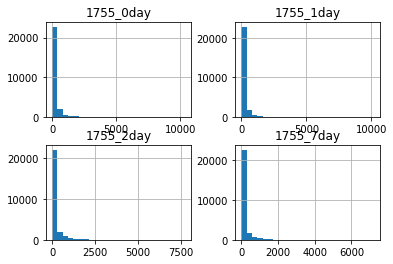

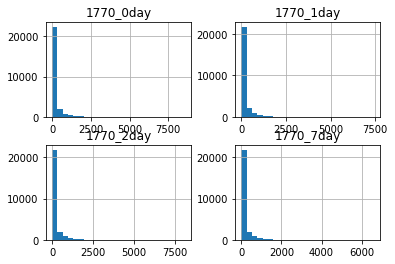

In [8]:
C1.hist(bins=25), T1.hist(bins=25)

# Bayesian 

In [37]:
y0C = ( C1[f'{C1.columns[0]}'] + C2[f'{C2.columns[0]}'] + C3[f'{C3.columns[0]}'] + C4[f'{C4.columns[0]}'] + C5[f'{C5.columns[0]}'] + C6[f'{C6.columns[0]}'] ) / 6
y0T = ( T1[f'{T1.columns[0]}'] + T2[f'{T2.columns[0]}'] + T3[f'{T3.columns[0]}'] + T4[f'{T4.columns[0]}'] + T5[f'{T5.columns[0]}'] + T6[f'{T6.columns[0]}'] ) / 6
l0c = len(y1C) 
l0t = len(y1T) 
y7C = ( C1[f'{C1.columns[3]}'] + C2[f'{C2.columns[3]}'] + C3[f'{C3.columns[3]}'] + C4[f'{C4.columns[3]}'] + C5[f'{C5.columns[3]}'] + C6[f'{C6.columns[3]}'] ) / 6
y7T = ( T1[f'{T1.columns[3]}'] + T2[f'{T2.columns[3]}'] + T3[f'{T3.columns[3]}'] + T4[f'{T4.columns[3]}'] + T5[f'{T5.columns[3]}'] + T6[f'{T6.columns[3]}'] ) / 6
l7c = len(y2C) 
l7t = len(y2T) 
ys = pd.DataFrame(
    dict(value=np.r_[y0C, y0T,y7C,y7T], group=np.r_[["y1C"] * l0c, ["y1T"] * l0t, ["y2C"] * l7c, ["y2T"] * l7t] )
) 

In [38]:
y0C.mean()

134.44223901723035

In [42]:
μ_my0C = y0C.mean()
μ_my0T = y0T.mean()
μ_my7C = y7C.mean()
μ_my7T = y7T.mean()
μ_sy0C = y0C.std() * 2
μ_sy0T = y0T.std() * 2
μ_sy7C = y7C.std() * 2
μ_sy7T = y7T.std()* 2

with pm.Model() as model:
    group1_mean = pm.Normal("Means Of Control Group Day 0", mu=μ_my0C, sd=μ_sy0C)
    group2_mean = pm.Normal("Means Of Test Group Day 0", mu=μ_my0T, sd=μ_sy0T)

    group3_mean = pm.Normal("Means Of Control Group Day 7", mu=μ_my7C, sd=μ_sy7C)
    group4_mean = pm.Normal("Means Of Test Group Day 7", mu=μ_my7T, sd=μ_sy7T)
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("Std Of Control Group Day 0", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("Std Of Test Group Day 0", lower=σ_low, upper=σ_high) 
    group3_std = pm.Uniform("Std Of Control Group Day 7", lower=σ_low, upper=σ_high) 
    group4_std = pm.Uniform("Std Of Test Group Day 7", lower=σ_low, upper=σ_high)    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

In [43]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2
    λ3 = group3_std ** -2
    λ4 = group4_std ** -2

    group1 = pm.StudentT("Day 0 Control Groups", nu=ν, mu=group1_mean, lam=λ1, observed=y0C)
    group2 = pm.StudentT("Day 0 Test Groups", nu=ν, mu=group2_mean, lam=λ2, observed=y0T) 
    group3 = pm.StudentT("Day 7 Control Groups", nu=ν, mu=group3_mean, lam=λ3, observed=y0C)
    group4 = pm.StudentT("Day 7 Test Groups", nu=ν, mu=group4_mean, lam=λ4, observed=y0T)

In [44]:
with model:
    diff_of_means_t0 = pm.Deterministic("Difference of Means Day 0 Control & Test",  ( group1_mean - group2_mean ) ) 
    diff_of_stds_t0 = pm.Deterministic("Difference of Stds Day 0 Control & Test",    ( group1_std - group2_std   ) )
    effect_size_t0 = pm.Deterministic(
        "effect_size_t0", diff_of_means_t0 /  np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )
    diff_of_means_t7 = pm.Deterministic("Difference of Means Day 7 Control & Test",  ( group3_mean - group4_mean ) ) 
    diff_of_stds_t7 = pm.Deterministic("Difference of Stds Day 7 Control & Test",    ( group3_std - group4_std   ) )
    effect_size_t7 = pm.Deterministic(
        "effect size_t7", diff_of_means_t7 /  np.sqrt((group3_std ** 2 + group4_std ** 2) / 2)
    )

In [45]:
model.deterministics

[Std Of Control Group Day 0 ~ Uniform,
 Std Of Test Group Day 0 ~ Uniform,
 Std Of Control Group Day 7 ~ Uniform,
 Std Of Test Group Day 7 ~ Uniform,
 ν_minus_one ~ Exponential,
 Difference of Means Day 0 Control & Test ~ Deterministic,
 Difference of Stds Day 0 Control & Test ~ Deterministic,
 effect_size_t0 ~ Deterministic,
 Difference of Means Day 7 Control & Test ~ Deterministic,
 Difference of Stds Day 7 Control & Test ~ Deterministic,
 effect size_t7 ~ Deterministic]

In [46]:
with model:
    step1 = pm.Metropolis()
    step2 = pm.NUTS()
    trace = pm.sample(1000,step=[step1, step2], cores=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [ν_minus_one]
>>Metropolis: [Std Of Test Group Day 7]
>>Metropolis: [Std Of Control Group Day 7]
>>Metropolis: [Std Of Test Group Day 0]
>>Metropolis: [Std Of Control Group Day 0]
>>Metropolis: [Means Of Test Group Day 7]
>>Metropolis: [Means Of Control Group Day 7]
>>Metropolis: [Means Of Test Group Day 0]
>>Metropolis: [Means Of Control Group Day 0]
>NUTS: [ν_minus_one, Std Of Test Group Day 7, Std Of Control Group Day 7, Std Of Test Group Day 0, Std Of Control Group Day 0, Means Of Test Group Day 7, Means Of Control Group Day 7, Means Of Test Group Day 0, Means Of Control Group Da

/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 468 seconds.


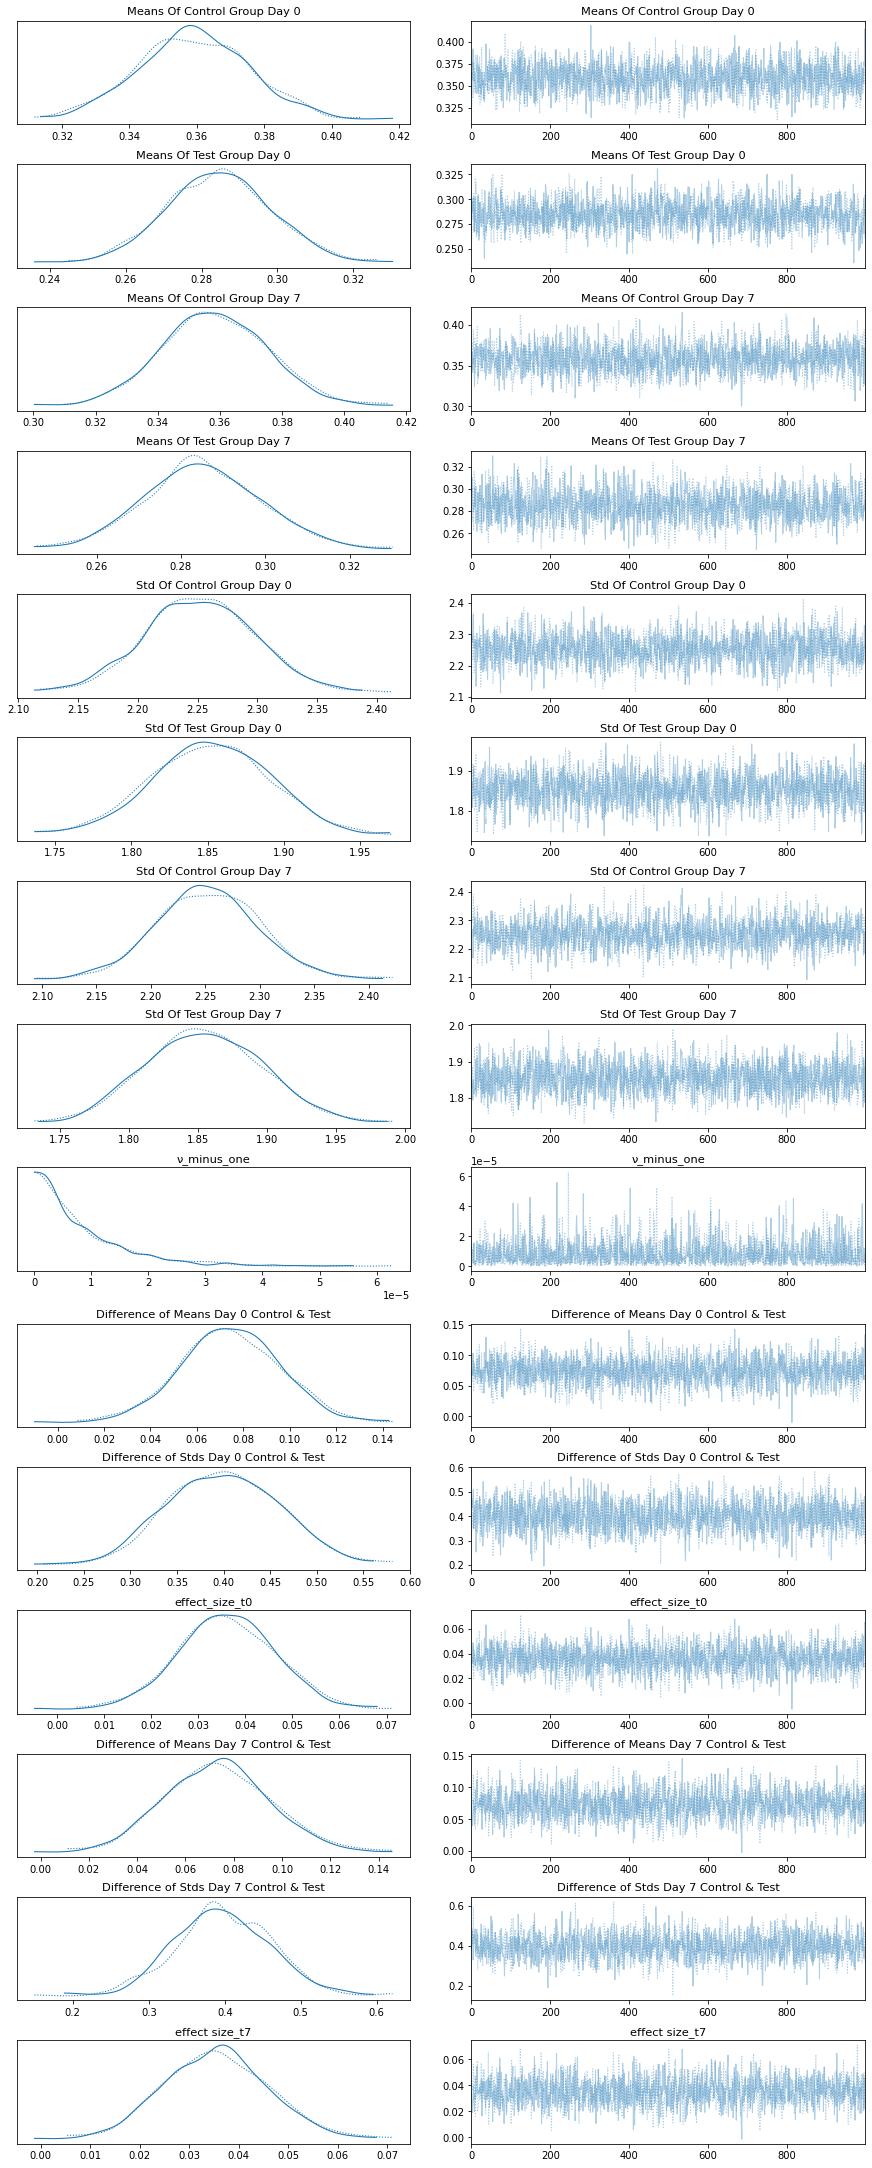

In [47]:
with model:
  az.plot_trace(trace);

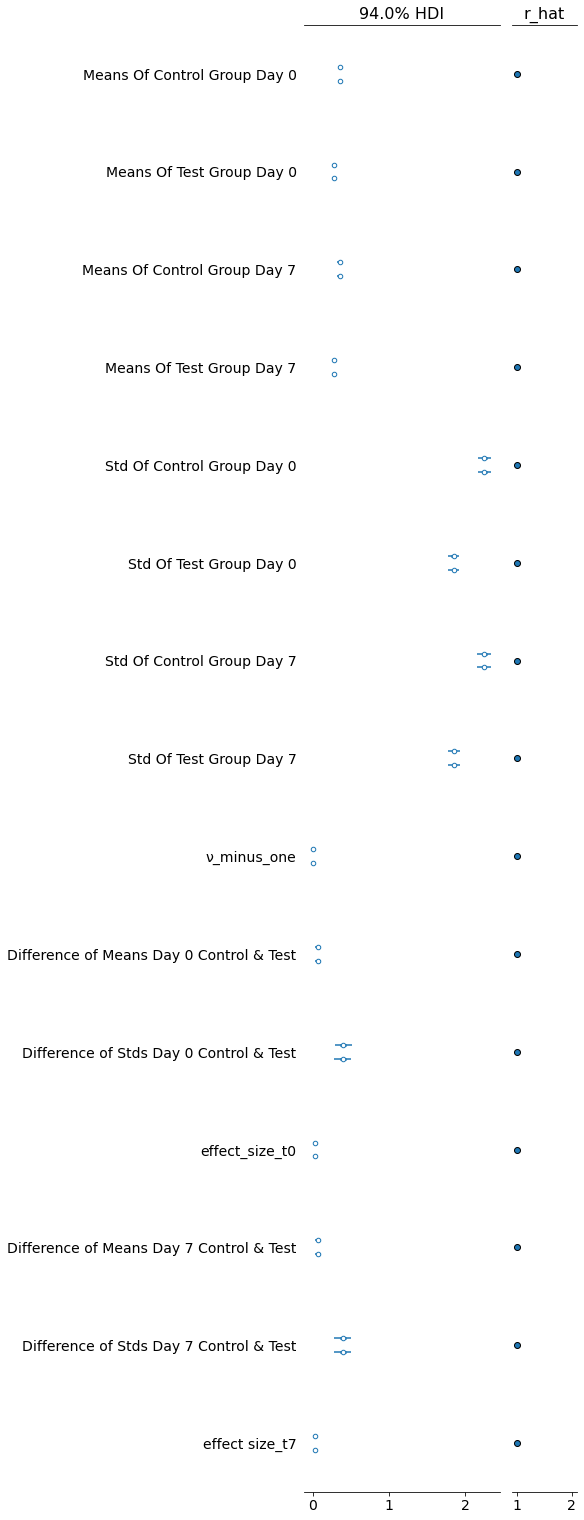

In [48]:
with model:
  az.plot_forest(trace, r_hat=True);


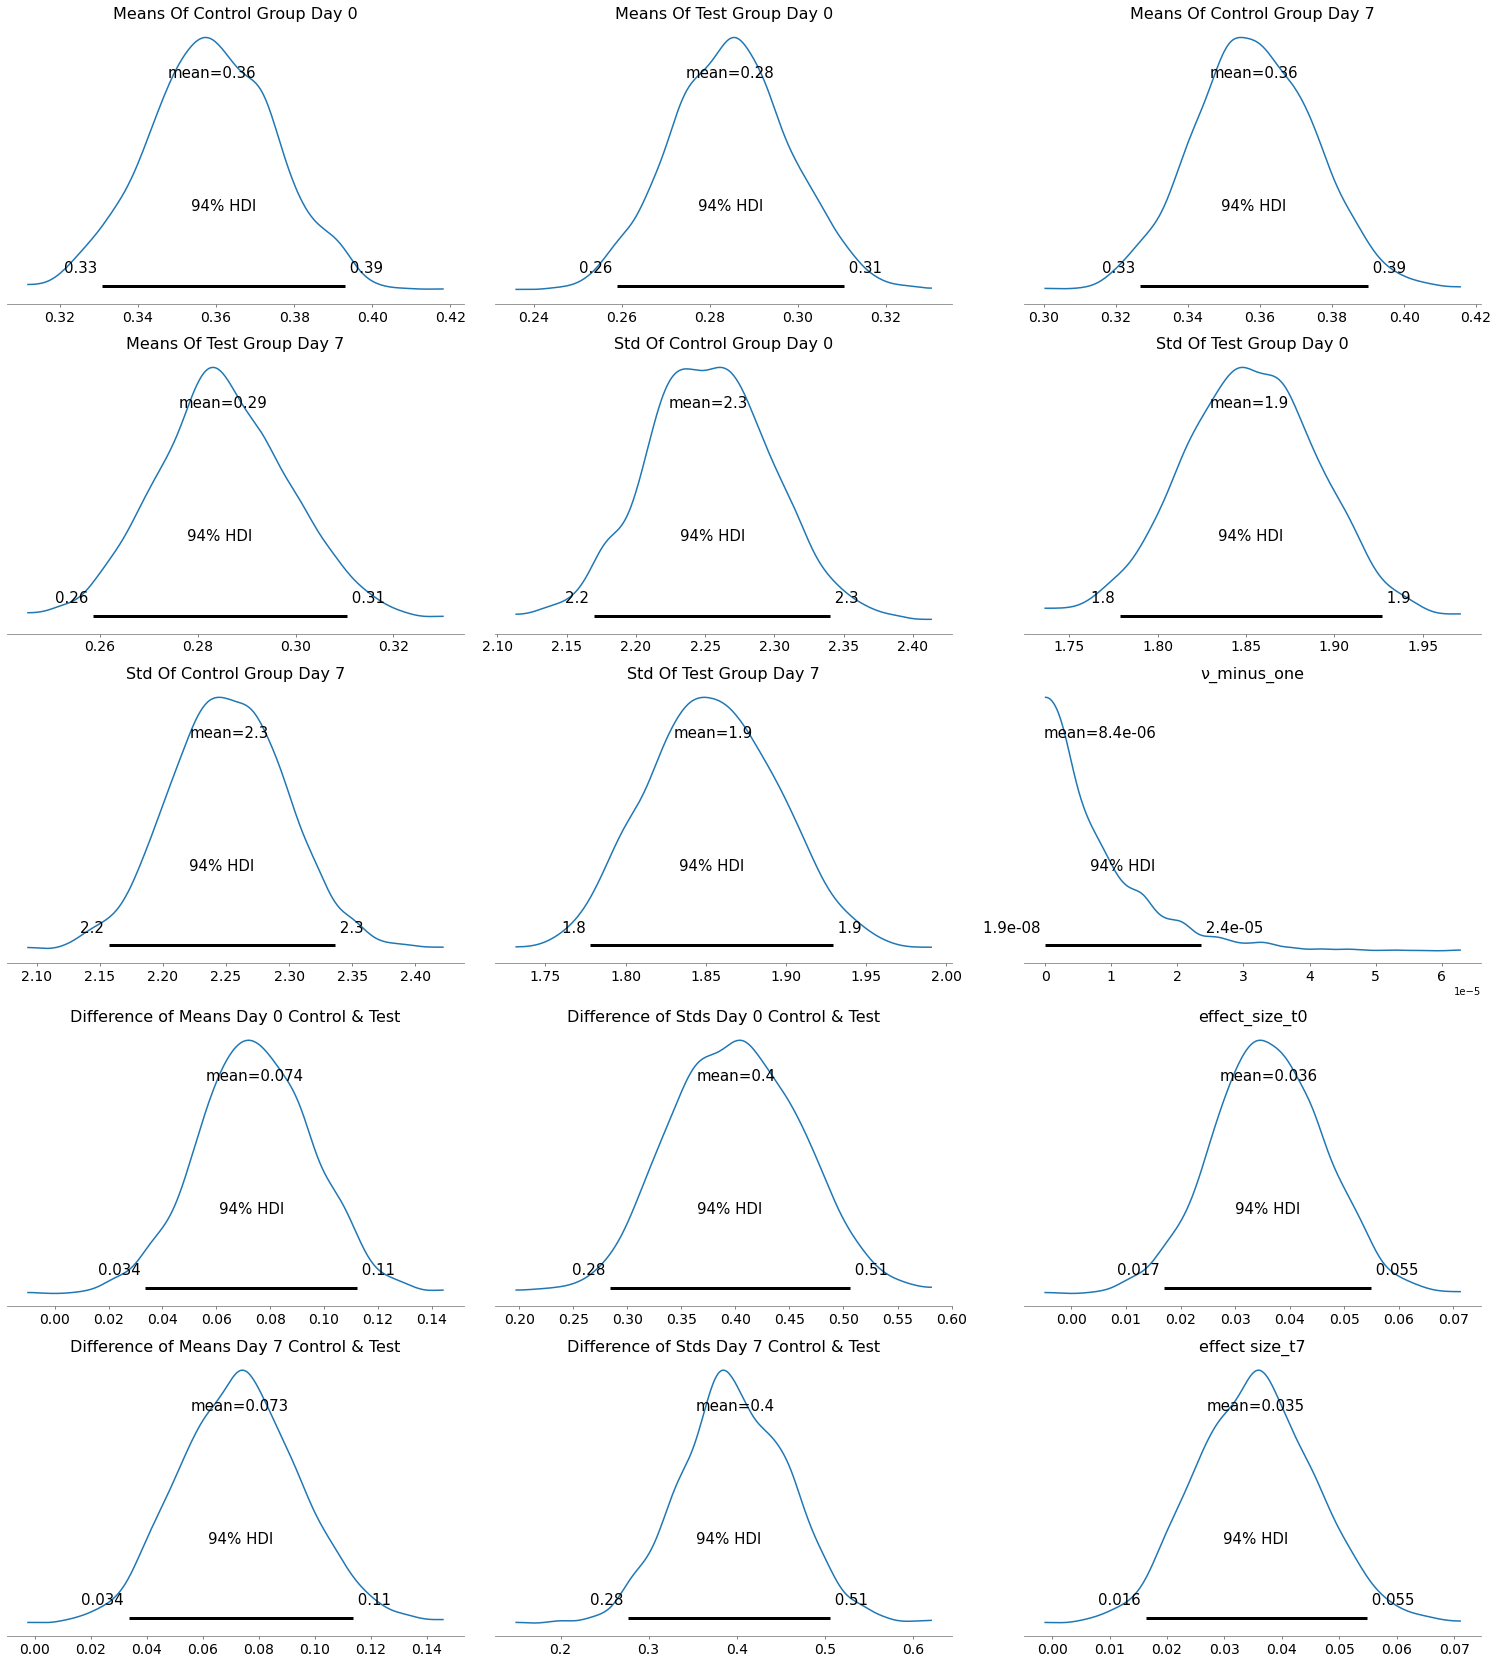

In [49]:
with model:
  az.plot_posterior(trace);

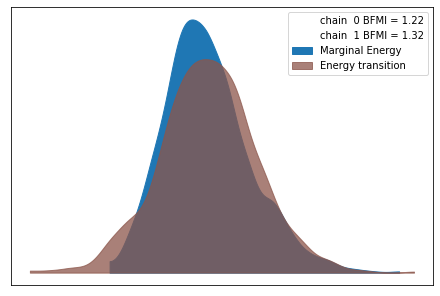

In [50]:
with model:
  az.plot_energy(trace);

# Bayesian Models (Control / Test Groups (I) )

Bayesian Model For Control Group I

In [154]:
mu = np.mean( C1['1755_0day'] + C1['1755_1day'] + C1['1755_2day'] ) / 3 
sd = np.std( C1['1755_0day'] + C1['1755_1day'] + C1['1755_2day']  ) / 3 
max = np.max( C1['1755_0day'] + C1['1755_1day'] + C1['1755_2day'] ) / 3 
min = np.min( C1['1755_0day'] + C1['1755_1day'] + C1['1755_2day'] ) / 3 
np.sqrt(mu),np.sqrt(sd)
lC1 = len(C1) 

In [162]:
with Model() as Control_G1_model:

    switchpoint = Uniform('switchpoint', lower=C1['1755_0day'].min(), upper=C1['1755_0day'].max())
    early_mean = Exponential('early_mean', lam=0.5)
    late_mean = Exponential('late_mean', lam=0.5)

    rate = switch(switchpoint >= C1['1755_0day'], early_mean, late_mean)
    
    disasters = Poisson('disasters', rate, observed=C1['1755_7day'])

In [163]:
from pymc3 import find_MAP

with Control_G1_model:
    
    start = find_MAP()

In [164]:
start

{'early_mean': array(111.2509737),
 'early_mean_log__': array(4.71178867),
 'late_mean': array(4704.29800417),
 'late_mean_log__': array(8.45623184),
 'switchpoint': array(5171.5),
 'switchpoint_interval__': array(0.)}

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57d70637d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57d70637d0>)

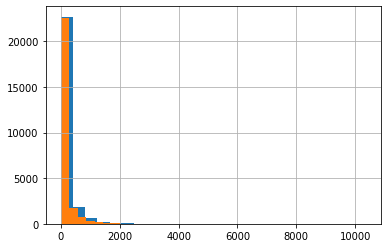

In [165]:
C1['1755_0day'].hist(bins=25),C1['1755_7day'].hist(bins=25) 

In [182]:
from pymc3 import sample, Metropolis

with Control_G1_model:
  
    step1 = pm.NUTS()
    step2 = pm.Slice()
    trace = sample( cores=2, start=start, step=[step1, step2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [late_mean, early_mean, switchpoint]
>CompoundStep
>>Slice: [late_mean]
>>Slice: [early_mean]
>>Slice: [switchpoint]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 103 seconds.
There were 472 divergences after tuning. Increase `target_accept` or reparameterize.
There were 342 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [183]:
from arviz import from_pymc3

model_output = from_pymc3(trace)
model_output

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

Bayesian Model For Test Group I

In [190]:
with Model() as Test_G1_model:

    switchpoint = Uniform('switchpoint', lower=T1['1770_0day'].min(), upper=T1['1770_0day'].max())
    early_mean = Exponential('early_mean', lam=0.5)
    late_mean = Exponential('late_mean', lam=0.5)

    rate = switch(switchpoint >= T1['1770_0day'], early_mean, late_mean)
    
    disasters = Poisson('disasters', rate, observed=T1['1770_7day'])

In [191]:
with Test_G1_model:
    
    start = find_MAP()

In [192]:
start

{'early_mean': array(125.60544449),
 'early_mean_log__': array(4.8331456),
 'late_mean': array(5150.14773272),
 'late_mean_log__': array(8.54678068),
 'switchpoint': array(4274.),
 'switchpoint_interval__': array(0.)}

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57f354ea90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57f354ea90>)

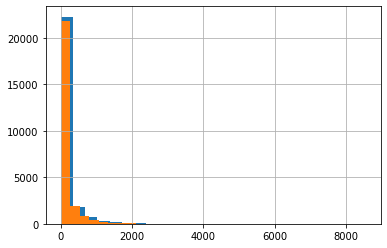

In [197]:
T1['1770_0day'].hist(bins=25),T1['1770_7day'].hist(bins=25) 

In [194]:
with Test_G1_model:
  
    step1 = pm.NUTS()
    step2 = pm.Slice()
    trace = sample( cores=2, start=start, step=[step1, step2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [late_mean, early_mean, switchpoint]
>CompoundStep
>>Slice: [late_mean]
>>Slice: [early_mean]
>>Slice: [switchpoint]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 111 seconds.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
There were 84 divergences after tuning. Increase `target_accept` or reparameterize.


In [195]:
model_output = from_pymc3(trace)
model_output

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57efb03610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57efb03610>)

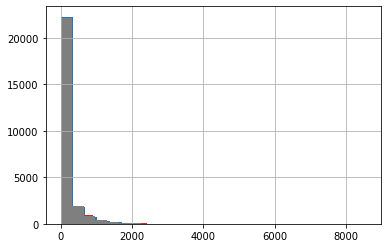

In [201]:
T1['1770_0day'].hist(bins=25),T1['1770_7day'].hist(bins=25), 
T2[f'{T2.columns[1]}'].hist(bins=25),T2[f'{T2.columns[1]}'].hist(bins=25), 
T3[f'{T3.columns[2]}'].hist(bins=25),T3[f'{T3.columns[2]}'].hist(bins=25), 
T4[f'{T4.columns[3]}'].hist(bins=25),T4[f'{T4.columns[3]}'].hist(bins=25), 

# Summary of Model (Control Group I)

Preprocessing For Different Way To Inference Data

In [59]:
C1_S0 = C1[f'{C1.columns[0]}'].values.reshape(-1,1).copy()
scaler = StandardScaler()
scaler.fit(C1_S0)
C1_S0 = scaler.transform(C1_S0) 

alpha = np.var(C1_S0)

C1_S1 = C1[f'{C1.columns[1]}'].values.reshape(-1,1).copy()
scaler = StandardScaler()
scaler.fit(C1_S1)
C1_S1 = scaler.transform(C1_S1) 

beta =  np.var(C1_S1) 

C1_S2 = C1[f'{C1.columns[2]}'].values.reshape(-1,1).copy()
scaler = StandardScaler()
scaler.fit(C1_S2)
C1_S2 = scaler.transform(C1_S2) 

gamma = np.var(C1_S2) 

C1_S3 = C1[f'{C1.columns[3]}'].values.reshape(-1,1).copy()
scaler = StandardScaler()
scaler.fit(C1_S3)
C1_S3 = scaler.transform(C1_S3) 

delta =  np.var(C1_S3) 

Summary Of Model

In [60]:
with pm.Model() as Summary_Model:
    mu = pm.Normal("mu", mu=np.mean(C1_S0), sigma=alpha)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=np.mean(gamma), sigma=tau, shape=3)

    obs = pm.Normal("obs", mu=theta, sigma=tau, observed=C1_S3)
with Summary_Model:
    short_trace = pm.sample(600, chains=2, random_seed=1956)    
pm.summary(short_trace).round(2)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, tau, mu]


Sampling 2 chains for 1_000 tune and 600 draw iterations (2_000 + 1_200 draws total) took 49 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.01,1.03,-1.96,1.98,0.02,0.03,1832.0,893.0,1.0
theta[0],0.00,0.01,-0.01,0.01,0.00,0.00,1664.0,868.0,1.0
theta[1],0.00,0.01,-0.01,0.01,0.00,0.00,2319.0,976.0,1.0
theta[2],-0.00,0.01,-0.01,0.01,0.00,0.00,1972.0,872.0,1.0
tau,1.00,0.00,1.00,1.00,0.00,0.00,1853.0,987.0,1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  This is separate from the ipykernel package so we can avoid doing imports until


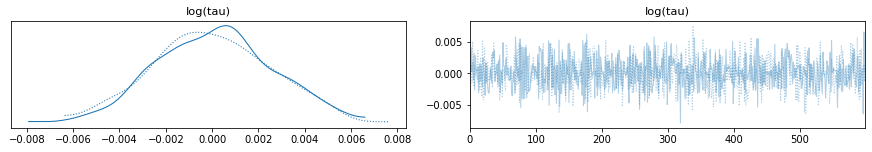

In [61]:
with Summary_Model:
  # plot the trace of log(tau)
  pm.traceplot({"log(tau)": short_trace.get_values(varname="tau_log__", combine=False)});

# Bayesian Estimation & Student T-Test (Within Group)
Control Group I

Trying to understand how expression changes within group by Student T-Test & Bayesian Estimation

In [48]:
y1,l1 = C1['1755_0day'], len(C1['1755_0day'])
y2,l2 = C1['1755_1day'], len(C1['1755_1day'])
y3,l3 = C1['1755_2day'], len(C1['1755_2day'])
y4,l4 = C1['1755_7day'], len(C1['1755_7day'])
y = pd.DataFrame(
    dict(value=np.r_[y1, y2,y3,y4], group=np.r_[["1755_0day"] * l1, ["1755_1day"] * l2, ["1755_2day"] * l3, ["1755_7day"] * l4] )
)

In [49]:
μ_m0 = C1.mean()[0]
μ_m1 = C1.mean()[1]
μ_m2 = C1.mean()[2]
μ_m7 = C1.mean()[3]
μ_s0 = C1.std()[0] * 2
μ_s1 = C1.std()[1] * 2
μ_s2 = C1.std()[2] * 2
μ_s7 = C1.std()[3] * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m0, sd=μ_s0)
    group2_mean = pm.Normal("group2_mean", mu=μ_m1, sd=μ_s1)
    group3_mean = pm.Normal("group3_mean", mu=μ_m2, sd=μ_s2)
    group4_mean = pm.Normal("group4_mean", mu=μ_m7, sd=μ_s7)
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high) 
    group3_std = pm.Uniform("group3_std", lower=σ_low, upper=σ_high) 
    group4_std = pm.Uniform("group4_std", lower=σ_low, upper=σ_high)    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1
#pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});   

Student T-Test

In [50]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2
    λ3 = group3_std ** -2
    λ4 = group4_std ** -2

    group1 = pm.StudentT("1755_0day", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("1755_1day", nu=ν, mu=group2_mean, lam=λ2, observed=y2) 
    group3 = pm.StudentT("1755_2day", nu=ν, mu=group3_mean, lam=λ3, observed=y3)
    group4 = pm.StudentT("1755_7day", nu=ν, mu=group4_mean, lam=λ4, observed=y4)

Effect is trying to be understood by difference of means in the expressions. 

In [51]:
with model:
    diff_of_means = pm.Deterministic("difference of means", ( ( group1_mean + group2_mean + group3_mean ) / 3 ) - group4_mean)
    diff_of_stds = pm.Deterministic("difference of stds",  ( ( group1_std + group2_std + group3_std ) / 3 ) - group4_std )
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2 + group3_std ** 2 + group4_std ** 2) / 4)
    )

In [52]:
with model:
    trace = pm.sample(2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν_minus_one, group4_std, group3_std, group2_std, group1_std, group4_mean, group3_mean, group2_mean, group1_mean]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1773 seconds.
The acceptance probability does not match the target. It is 0.9862462179738483, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9921782659523737, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group3_mean", "group4_mean", "group1_std", "group2_std","group3_std", "group4_std", "ν_minus_one"],
    color="#87ceeb",
);


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


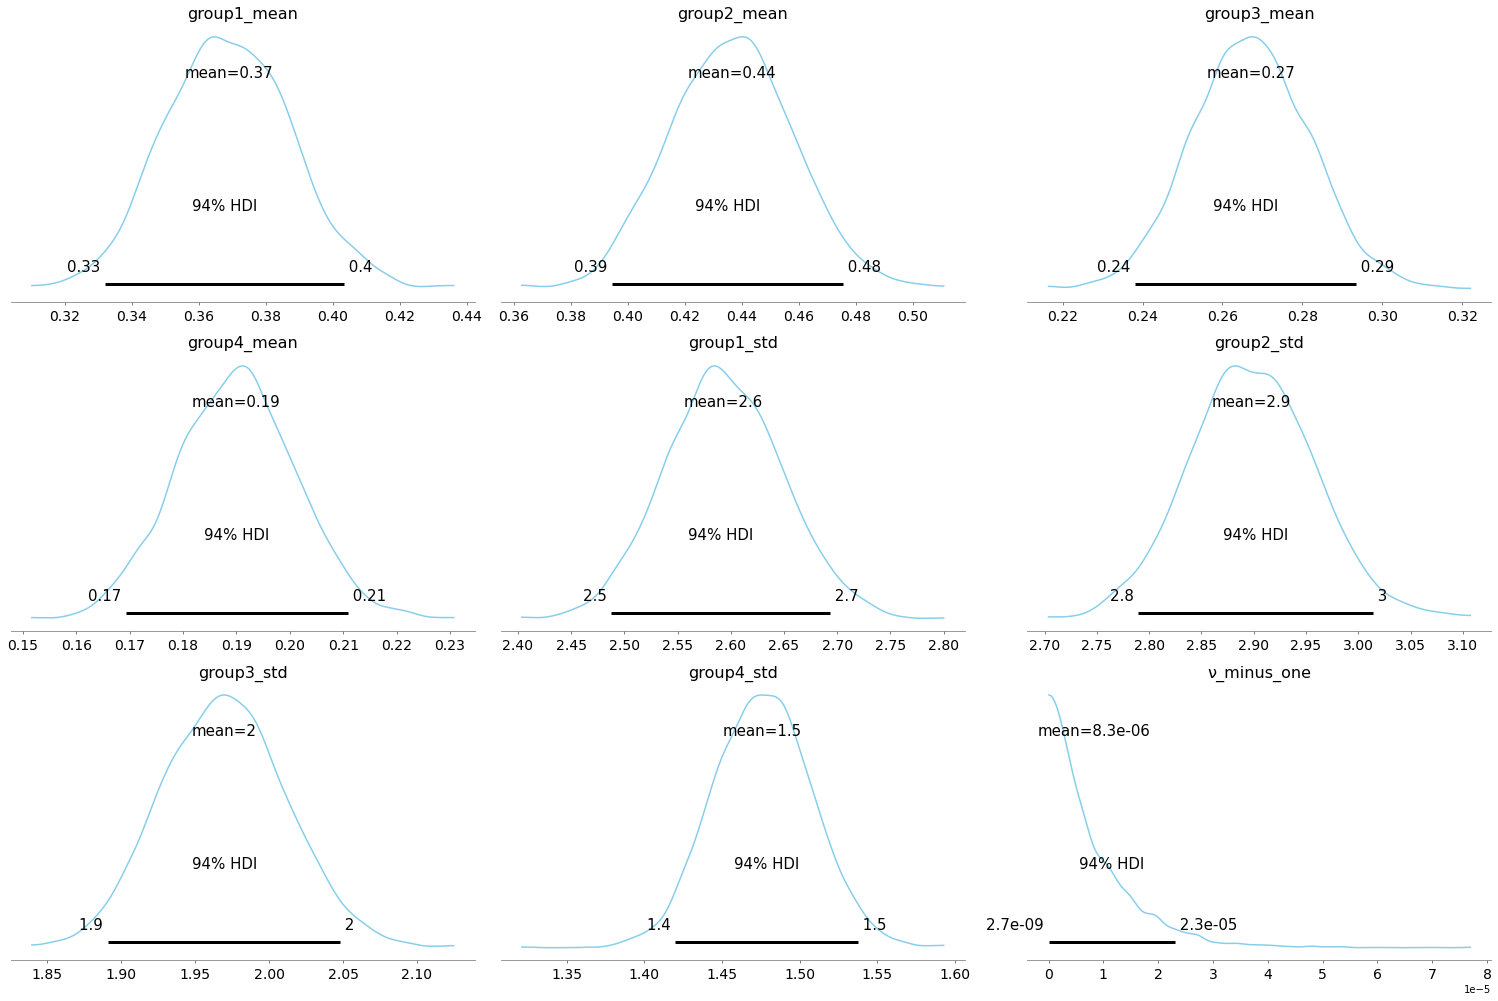

In [53]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group3_mean", "group4_mean", "group1_std", "group2_std","group3_std", "group4_std", "ν_minus_one"],
    color="#87ceeb",
);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


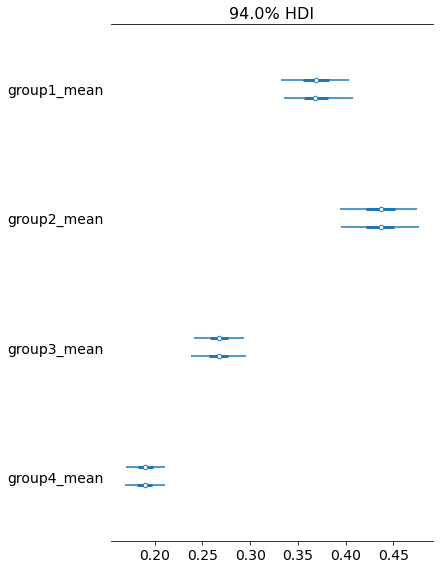

In [54]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean", "group3_mean", "group4_mean"]);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


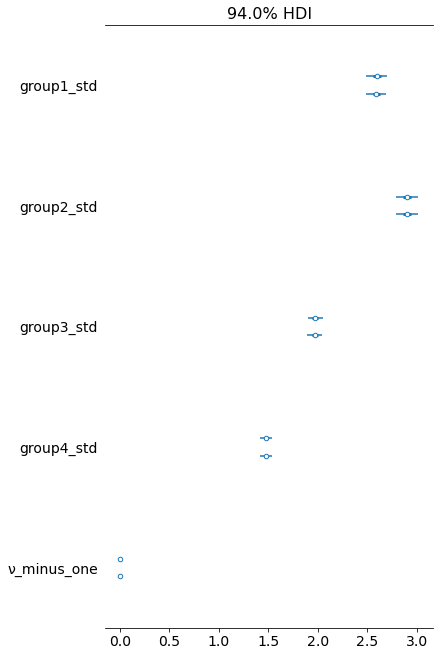

In [55]:
pm.forestplot(trace, var_names=["group1_std", "group2_std","group3_std", "group4_std", "ν_minus_one"]);
